In [1]:
import os.path
import datetime
import pandas as pd
import numpy as np
import hashlib
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import squareform, pdist
from matplotlib.patches import Arc

%matplotlib inline

# Display all columns in Pandas
pd.set_option('display.max_columns', None) 

In [2]:
from soccerplots.radar_chart import Radar

In [3]:
# Constants
pace_threshold = 10
#euclidean_distance_threshold = 200

In [4]:
# Read in Split Timings
df = pd.read_excel('Galway_v_Kerry_F_Full.xlsx', encoding = "ISO-8859-1")

In [5]:
len(df)

367

In [6]:
# Drop unnecessary columns
#df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'bib','team', 'rank', 'nationality'], axis = 1)

In [7]:
df.head()

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter
0,0,0,2,fouled,70.777982,30.176372,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN
1,1,1,2,successful pass,77.318583,35.489241,111.493222,38.809784,"(77.31858314794216, 35.48924051800473)","(111.49322163515019, 38.809783611275094)",NaN,NaN,1,NaN,2,NaN
2,2,2,2,successful pass,111.329707,38.809784,106.587771,40.138001,"(111.32970661846498, 38.809783611275094)","(106.587771134594, 40.13800084858324)",NaN,NaN,1,NaN,2,NaN
3,3,3,2,fouled,107.405346,39.971974,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN
4,4,4,2,free,108.059406,36.983485,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN


In [8]:
df.shape

(367, 16)

In [9]:
df.groupby('Action').count()

,Unnamed: 0,Event_No,Half,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter
Action,,,,,,,,,,,,,,,
block,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0
blocked,2,2,2,2,2,0,0,0,0,0,0,2,0,2,0
fortyfive,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0
foul against,11,11,11,11,11,0,0,0,0,0,0,11,0,11,0
fouled,11,11,11,11,11,0,0,0,0,0,0,11,0,11,0
free,4,4,4,4,4,0,0,0,0,0,0,4,0,4,0
free wide,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0
interception,5,5,5,5,5,0,0,0,0,0,0,5,0,5,0
point,11,11,11,11,11,0,0,0,0,0,0,11,0,11,0


In [10]:
df = df[(df['Action'].str.contains('free')) | (df['Action'].str.contains('point')) | (df['Action'].str.contains('wide'))
 |  (df['Action'].str.contains('free short'))
  | (df['Action'].str.contains('short'))
       | (df['Action'].str.contains('fortyfive'))
       | (df['Action'].str.contains('fortyfive short'))
       | (df['Action'].str.contains('fortyfive wide'))
       | (df['Action'].str.contains('missed 45'))
       | (df['Action'].str.contains('offensive mark'))
       | (df['Action'].str.contains('offensive mark wide'))
       | (df['Action'].str.contains('fouled'))
        | (df['Action'].str.contains('turnover'))
               | (df['Action'].str.contains('pass'))
        | (df['Action'].str.contains('kickout'))
        | (df['Action'].str.contains('interception'))
       ]

In [11]:
pdf = df[(df['Action'].str.match('successful pass')) | (df['Action'].str.match('successful kickout'))]
pdf.x1 = pdf.x2
pdf.y1 = pdf.y2
pdf

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter
1,1,1,2,successful pass,111.493222,38.809784,111.493222,38.809784,"(77.31858314794216, 35.48924051800473)","(111.49322163515019, 38.809783611275094)",NaN,NaN,1,NaN,2,NaN
2,2,2,2,successful pass,106.587771,40.138001,106.587771,40.138001,"(111.32970661846498, 38.809783611275094)","(106.587771134594, 40.13800084858324)",NaN,NaN,1,NaN,2,NaN
6,6,6,2,successful kickout,40.200674,86.459577,40.200674,86.459577,"(20.742387374860964, 45.28484264315231)","(40.200674360400455, 86.45957699970485)",NaN,NaN,1,NaN,2,NaN
7,7,7,2,successful pass,24.012688,68.694671,24.012688,68.694671,"(29.245168242491662, 77.16205633854783)","(24.01268770856508, 68.6946714507084)",NaN,NaN,1,NaN,2,NaN
8,8,8,2,successful pass,46.414245,9.921059,46.414245,9.921059,"(31.534378476084544, 45.948951261806386)","(46.41424499443828, 9.921058699822906)",NaN,NaN,1,NaN,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,360,360,1,successful pass,85.177524,15.320677,85.177524,15.320677,"(54.09945077864295, 71.01905161599765)","(59.82247636262515, 72.67932316263284)",NaN,NaN,1,NaN,1,NaN
361,361,361,1,successful pass,84.686979,13.992460,84.686979,13.992460,"(46.08721496106786, 85.13135976239671)","(60.31302141268077, 74.00754039994098)",NaN,NaN,1,NaN,1,NaN
362,362,362,1,successful pass,70.951717,39.892696,70.951717,39.892696,"(60.967081479421594, 70.18891584268006)","(74.04828281423805, 48.107304272432124)",NaN,NaN,1,NaN,1,NaN
363,363,363,1,successful pass,96.296545,77.912914,96.296545,77.912914,"(55.08054087875418, 36.651430600649356)","(48.70345522803116, 10.087085854486427)",NaN,NaN,1,NaN,1,NaN


In [12]:
frames = [df, pdf]
df = pd.concat(frames)

In [13]:
df['Team'] = 'Galway'

In [14]:
df['Value'] = 0

In [15]:
len(df)

584

# ------------------------

In [16]:
# Read in Split Timings
df1 = pd.read_excel('Kerry_v_Galway_F_Full.xlsx', encoding = "ISO-8859-1")

In [17]:
df1['mx'] = 72.5

df1['my'] = 44

In [18]:
df1['x1'] = 2*df1['mx'] - df1['x1']
df1['y1'] = 2*df1['my'] - df1['y1']
df1['x2'] = 2*df1['mx'] - df1['x2']
df1['y2'] = 2*df1['my'] - df1['y2']

In [19]:
len(df1)

411

In [20]:
df1[df1.Action == 'point']

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,mx,my
95,95,95,1,point,41.519014,30.595175,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,72.5,44
108,108,108,1,point,35.959504,35.908044,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,72.5,44
202,202,202,2,point,20.415357,69.026726,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,72.5,44
219,219,219,2,point,31.534378,47.609223,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,72.5,44
235,235,235,2,point,10.931486,35.323213,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,72.5,44
238,238,238,2,point,39.219584,48.439359,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,72.5,44
258,258,258,2,point,21.396447,73.509459,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,72.5,44
288,288,288,2,point,36.439829,50.431684,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,72.5,44
315,315,315,2,point,25.974868,53.254146,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,72.5,44
379,379,379,2,point,1.938160,36.319376,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,72.5,44


In [21]:
# Drop unnecessary columns
#df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'bib','team', 'rank', 'nationality'], axis = 1)

In [22]:
df1.head()

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,mx,my
0,0,0,1,turnover,74.712563,43.047212,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,72.5,44
1,1,1,1,fouled,48.223130,38.066397,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,72.5,44
2,2,2,1,free wide,48.059615,38.398451,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,72.5,44
3,3,3,1,successful pass,86.976189,52.676787,85.504554,45.537619,"(58.023811179087886, 35.32321336334121)","(59.49544632925473, 42.4623810138725)",NaN,NaN,1,NaN,1,NaN,72.5,44
4,4,4,1,successful pass,80.435588,42.549130,68.989537,51.016515,"(64.56441184649611, 45.45086979781583)","(76.01046301446053, 36.98348490997639)",NaN,NaN,1,NaN,1,NaN,72.5,44


In [23]:
df1.shape

(411, 18)

In [24]:
df1.groupby('Action').count()

,Unnamed: 0,Event_No,Half,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,mx,my
Action,,,,,,,,,,,,,,,,,
block,3,3,3,3,3,0,0,0,0,0,0,3,0,3,0,3,3
blocked,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0,1,1
foul against,9,9,9,9,9,0,0,0,0,0,0,9,0,9,0,9,9
fouled,10,10,10,10,10,0,0,0,0,0,0,10,0,10,0,10,10
free,6,6,6,6,6,0,0,0,0,0,0,6,0,6,0,6,6
free wide,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0,1,1
goal miss,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0,1,1
interception,10,10,10,10,10,0,0,0,0,0,0,10,0,10,0,10,10
offensive mark,3,3,3,3,3,0,0,0,0,0,0,3,0,3,0,3,3


In [25]:
df1 = df1[(df1['Action'].str.contains('free')) | (df1['Action'].str.contains('point')) | (df1['Action'].str.contains('wide'))
 |  (df1['Action'].str.contains('free short'))
  | (df1['Action'].str.contains('short'))
       | (df1['Action'].str.contains('fortyfive'))
       | (df1['Action'].str.contains('fortyfive short'))
       | (df1['Action'].str.contains('fortyfive wide'))
       | (df1['Action'].str.contains('missed 45'))
       | (df1['Action'].str.contains('offensive mark'))
       | (df1['Action'].str.contains('offensive mark wide'))
       | (df1['Action'].str.contains('fouled'))
        | (df1['Action'].str.contains('turnover'))
        | (df1['Action'].str.contains('pass'))
        | (df1['Action'].str.contains('kickout'))
        | (df1['Action'].str.contains('interception'))
       ]

In [26]:
pdf1 = df1[(df1['Action'].str.match('successful pass')) | (df1['Action'].str.match('successful kickout'))]
pdf1.x1 = pdf1.x2
pdf1.y1 = pdf1.y2
pdf1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,mx,my
3,3,3,1,successful pass,85.504554,45.537619,85.504554,45.537619,"(58.023811179087886, 35.32321336334121)","(59.49544632925473, 42.4623810138725)",NaN,NaN,1,NaN,1,NaN,72.5,44
4,4,4,1,successful pass,68.989537,51.016515,68.989537,51.016515,"(64.56441184649611, 45.45086979781583)","(76.01046301446053, 36.98348490997639)",NaN,NaN,1,NaN,1,NaN,72.5,44
5,5,5,1,successful pass,74.222018,36.572153,74.222018,36.572153,"(75.0293729143493, 42.62840816853602)","(70.77798248053394, 51.42784736570249)",NaN,NaN,1,NaN,1,NaN,72.5,44
6,6,6,1,successful pass,61.467846,17.811084,61.467846,17.811084,"(70.77798248053394, 60.559340872196)","(83.53215378197999, 70.18891584268006)",NaN,NaN,1,NaN,1,NaN,72.5,44
11,11,11,1,successful kickout,80.926133,39.394614,80.926133,39.394614,"(20.742387374860964, 45.11881548848879)","(64.0738667964405, 48.605385736422676)",NaN,NaN,1,NaN,1,NaN,72.5,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,401,401,2,successful pass,49.357515,24.033367,49.357515,24.033367,"(58.187326195773096, 6.102434142561984)","(49.357515294771986, 24.033366846221966)",NaN,NaN,1,NaN,2,NaN,72.5,44
402,402,402,2,successful pass,21.886992,26.025693,21.886992,26.025693,"(41.6723095105673, 26.52377416617474)","(21.886992491657406, 26.02569270218418)",NaN,NaN,1,NaN,2,NaN,72.5,44
406,406,406,2,successful pass,141.579985,58.567015,141.579985,58.567015,"(143.21513487208009, 50.5977115923849)","(141.57998470522804, 58.56701501623378)",NaN,NaN,1,NaN,2,NaN,72.5,44
407,407,407,2,successful pass,137.655624,67.698509,137.655624,67.698509,"(141.25295467185762, 62.88372103748526)","(137.6556243047831, 67.69850852272728)",NaN,NaN,1,NaN,2,NaN,72.5,44


In [27]:
frames1 = [df1, pdf1]
df1 = pd.concat(frames1)

In [28]:
df1['Team'] = 'Kerry'

In [29]:
df1['Value'] = 1

In [30]:
len(df1)

671

In [31]:
frames2 = [df, df1]
df2 = pd.concat(frames2)

In [32]:
df2

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,Team,Value,mx,my
0,0,0,2,fouled,70.777982,30.176372,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,Galway,0,NaN,NaN
1,1,1,2,successful pass,77.318583,35.489241,111.493222,38.809784,"(77.31858314794216, 35.48924051800473)","(111.49322163515019, 38.809783611275094)",NaN,NaN,1,NaN,2,NaN,Galway,0,NaN,NaN
2,2,2,2,successful pass,111.329707,38.809784,106.587771,40.138001,"(111.32970661846498, 38.809783611275094)","(106.587771134594, 40.13800084858324)",NaN,NaN,1,NaN,2,NaN,Galway,0,NaN,NaN
3,3,3,2,fouled,107.405346,39.971974,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,Galway,0,NaN,NaN
4,4,4,2,free,108.059406,36.983485,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,Galway,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,401,401,2,successful pass,49.357515,24.033367,49.357515,24.033367,"(58.187326195773096, 6.102434142561984)","(49.357515294771986, 24.033366846221966)",NaN,NaN,1,NaN,2,NaN,Kerry,1,72.5,44.0
402,402,402,2,successful pass,21.886992,26.025693,21.886992,26.025693,"(41.6723095105673, 26.52377416617474)","(21.886992491657406, 26.02569270218418)",NaN,NaN,1,NaN,2,NaN,Kerry,1,72.5,44.0
406,406,406,2,successful pass,141.579985,58.567015,141.579985,58.567015,"(143.21513487208009, 50.5977115923849)","(141.57998470522804, 58.56701501623378)",NaN,NaN,1,NaN,2,NaN,Kerry,1,72.5,44.0
407,407,407,2,successful pass,137.655624,67.698509,137.655624,67.698509,"(141.25295467185762, 62.88372103748526)","(137.6556243047831, 67.69850852272728)",NaN,NaN,1,NaN,2,NaN,Kerry,1,72.5,44.0


In [33]:
def find_similar_times(index):
    query = df2.iloc[index]
    #same_category = npb[npb.category == query.category]
   # similar_times = same_category[(same_category.AVG_Pace > query.AVG_Pace - pace_threshold) & (same_category.AVG_Pace < query.AVG_Pace + pace_threshold)]
    similar_area = df2[(df2.x1 > query.x1 - pace_threshold) & (df2.x1 < query.x1 + pace_threshold) & (df2.y1 > query.y1 - pace_threshold) & (df2.y1 < query.y1 + pace_threshold)]
    #find all runners either 0.5 minutes/kilometre faster or slower than the query runner
   # if len(similar_times) = 1:
    #    similar_times
   
    return similar_area
    #else:
     #   return None

# Show sample output
find_similar_times(18)

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,Team,Value,mx,my
20,20,20,2,point,128.662298,20.214742,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,Galway,0,NaN,NaN
50,50,50,2,successful pass,131.605569,16.064063,140.271865,61.721531,"(131.6055686874305, 16.06406342237309)","(140.2718645717464, 61.72153095484063)",NaN,NaN,1,NaN,2,NaN,Galway,0,NaN,NaN
138,138,138,2,point,120.323033,26.025693,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,Galway,0,NaN,NaN
162,162,162,2,successful pass,127.681208,12.411466,113.618917,29.844317,"(127.68120828698555, 12.411466019775682)","(113.61891685205786, 29.844317259445106)",NaN,NaN,1,NaN,2,NaN,Galway,0,NaN,NaN
221,221,221,1,successful pass,131.942818,20.135464,132.106333,12.664242,"(13.057181590656288, 67.8645356773908)","(12.893666573971085, 75.33575763724913)",NaN,NaN,1,NaN,1,NaN,Galway,0,NaN,NaN
275,275,275,1,fouled,121.477857,26.610523,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,Galway,0,NaN,NaN
331,331,331,1,point,128.509003,19.305329,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,Galway,0,NaN,NaN
161,161,161,2,successful pass,125.391998,16.894199,125.391998,16.894199,"(98.24850528364851, 38.97581076593861)","(125.39199805339267, 16.894199195690675)",NaN,NaN,1,NaN,2,NaN,Galway,0,NaN,NaN
220,220,220,1,successful pass,132.433363,21.463682,132.433363,21.463682,"(2.265190489432708, 74.33959470926801)","(12.566636540600673, 66.53631844008265)",NaN,NaN,1,NaN,1,NaN,Galway,0,NaN,NaN
221,221,221,1,successful pass,132.106333,12.664242,132.106333,12.664242,"(13.057181590656288, 67.8645356773908)","(12.893666573971085, 75.33575763724913)",NaN,NaN,1,NaN,1,NaN,Galway,0,NaN,NaN


In [34]:
def get_mean_pb(neighbours):
    mean = neighbours.Value.mean() 
    return mean
    
# Show sample output    
neighbours = find_similar_times(18)
get_mean_pb(neighbours)

0.42857142857142855

In [35]:
def update_rows(row):
    index = int(row['Mean'])
   # row['query_AVG_Pace'] = merge.iloc[index].AVG_Pace
   # row['Expected_Value1'] = df.iloc[index].Result_Count
    neighbours = find_similar_times(index)
    row['Mean'] = get_mean_pb(neighbours)
   # row['weighted_mean_pb_ap'] = weighted_pace(neighbours)
  #  row['best_average_pace'] = get_best_npb(neighbours)
    #row['best_pb_prediction'] = get_mean_pb(index, neighbours)
  #  row['weighted_mean'] = get_weight_mean(neighbours)
  #  neighbours1 = euc_find_nearest_neighbours(index)
  #  row['euc_weighted_mean'] = euc_get_weight_mean(neighbours1)
   # row['ranked_mean'] = get_rank_mean(neighbours)
    return row

In [36]:
df

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,Team,Value
0,0,0,2,fouled,70.777982,30.176372,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,Galway,0
1,1,1,2,successful pass,77.318583,35.489241,111.493222,38.809784,"(77.31858314794216, 35.48924051800473)","(111.49322163515019, 38.809783611275094)",NaN,NaN,1,NaN,2,NaN,Galway,0
2,2,2,2,successful pass,111.329707,38.809784,106.587771,40.138001,"(111.32970661846498, 38.809783611275094)","(106.587771134594, 40.13800084858324)",NaN,NaN,1,NaN,2,NaN,Galway,0
3,3,3,2,fouled,107.405346,39.971974,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,Galway,0
4,4,4,2,free,108.059406,36.983485,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,Galway,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,360,360,1,successful pass,85.177524,15.320677,85.177524,15.320677,"(54.09945077864295, 71.01905161599765)","(59.82247636262515, 72.67932316263284)",NaN,NaN,1,NaN,1,NaN,Galway,0
361,361,361,1,successful pass,84.686979,13.992460,84.686979,13.992460,"(46.08721496106786, 85.13135976239671)","(60.31302141268077, 74.00754039994098)",NaN,NaN,1,NaN,1,NaN,Galway,0
362,362,362,1,successful pass,70.951717,39.892696,70.951717,39.892696,"(60.967081479421594, 70.18891584268006)","(74.04828281423805, 48.107304272432124)",NaN,NaN,1,NaN,1,NaN,Galway,0
363,363,363,1,successful pass,96.296545,77.912914,96.296545,77.912914,"(55.08054087875418, 36.651430600649356)","(48.70345522803116, 10.087085854486427)",NaN,NaN,1,NaN,1,NaN,Galway,0


In [37]:
num_of_points = df2.Action.count()
filler_data = np.arange(0.0, num_of_points)
df3 = pd.DataFrame({'Mean':filler_data})

df3 = df3.apply(lambda row: update_rows(row), axis=1)
df3 = df3[['Mean']]
df3

,Mean
0,0.466667
1,0.457143
2,0.608696
3,0.512195
4,0.434783
...,...
1250,0.671642
1251,0.594595
1252,0.545455
1253,0.363636


In [38]:
df2 = df2.reset_index()

In [39]:
df4 = df2.join(df3)

In [40]:
df4

,index,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,Team,Value,mx,my,Mean
0,0,0,0,2,fouled,70.777982,30.176372,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,Galway,0,NaN,NaN,0.466667
1,1,1,1,2,successful pass,77.318583,35.489241,111.493222,38.809784,"(77.31858314794216, 35.48924051800473)","(111.49322163515019, 38.809783611275094)",NaN,NaN,1,NaN,2,NaN,Galway,0,NaN,NaN,0.457143
2,2,2,2,2,successful pass,111.329707,38.809784,106.587771,40.138001,"(111.32970661846498, 38.809783611275094)","(106.587771134594, 40.13800084858324)",NaN,NaN,1,NaN,2,NaN,Galway,0,NaN,NaN,0.608696
3,3,3,3,2,fouled,107.405346,39.971974,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,Galway,0,NaN,NaN,0.512195
4,4,4,4,2,free,108.059406,36.983485,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,Galway,0,NaN,NaN,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,401,401,401,2,successful pass,49.357515,24.033367,49.357515,24.033367,"(58.187326195773096, 6.102434142561984)","(49.357515294771986, 24.033366846221966)",NaN,NaN,1,NaN,2,NaN,Kerry,1,72.5,44.0,0.671642
1251,402,402,402,2,successful pass,21.886992,26.025693,21.886992,26.025693,"(41.6723095105673, 26.52377416617474)","(21.886992491657406, 26.02569270218418)",NaN,NaN,1,NaN,2,NaN,Kerry,1,72.5,44.0,0.594595
1252,406,406,406,2,successful pass,141.579985,58.567015,141.579985,58.567015,"(143.21513487208009, 50.5977115923849)","(141.57998470522804, 58.56701501623378)",NaN,NaN,1,NaN,2,NaN,Kerry,1,72.5,44.0,0.545455
1253,407,407,407,2,successful pass,137.655624,67.698509,137.655624,67.698509,"(141.25295467185762, 62.88372103748526)","(137.6556243047831, 67.69850852272728)",NaN,NaN,1,NaN,2,NaN,Kerry,1,72.5,44.0,0.363636


In [41]:
x = df4.x1
y = df4.y1
value = df4.Mean
#bins = (np.arange(6), np.arange(6))
#bins = ([0, 20, 40, 60, 80, 100, 120, 144], [0, 20, 40, 60, 88])
cats = ['0-20', '20-40', '40-60', '60-85', '85-105', '105-125', '125-145']
bins = ([0, 20, 40, 60, 80, 100, 120, 145], [0, 15, 30, 45, 60, 75, 89])
#bins = (np.arange(0, 5.0001, 2.5), np.arange(0, 5.0001, 2.5))
sums, _, _ = np.histogram2d(x, y, bins=bins, weights=value)
counts, _, _ = np.histogram2d(x, y, bins=bins)
with  np.errstate(divide='ignore', invalid='ignore'):  # divide 0 by 0 results in NaN
    means = sums / counts

test = pd.DataFrame(means)

test = test.T

test

,0,1,2,3,4,5,6
0,0.809030,0.856439,0.812503,0.539718,0.261892,0.349799,0.339036
1,0.813317,0.695349,0.701790,0.501838,0.268861,0.359208,0.417827
2,0.474292,0.362110,0.640466,0.509680,0.364785,0.545838,0.756611
3,0.366117,0.343713,0.617720,0.564840,0.384763,0.616052,0.748612
4,0.747960,0.653401,0.712641,0.529165,0.362106,0.373708,0.333370
5,0.766123,0.668082,0.653891,0.548740,0.424743,0.393931,0.583333


In [42]:
def rounding(s):
    if s < 0.45:
        return 0
    elif s > 0.55:
        return 1
    return 0.5

test[0] = test[0].apply(rounding)
test[1] = test[1].apply(rounding)
test[2] = test[2].apply(rounding)
test[3] = test[3].apply(rounding)
test[4] = test[4].apply(rounding)
test[5] = test[5].apply(rounding)
test[6] = test[6].apply(rounding)
test

,0,1,2,3,4,5,6
0,1.0,1,1,0.5,0,0.0,0
1,1.0,1,1,0.5,0,0.0,0
2,0.5,0,1,0.5,0,0.5,1
3,0.0,0,1,1.0,0,1.0,1
4,1.0,1,1,0.5,0,0.0,0
5,1.0,1,1,0.5,0,0.0,1


In [43]:
def draw_map():
  #  data = data[(data['Action'] == "point") | (data['Action'] == "short") & (data['Player_Name'] == player_name)]
    #data = data[(data['Player_Name'] == player_name)]
 #   good_pass = data[(data['Action'].str.contains("good")) & (data['Player_Name'] == player_name)]
  #  bad_pass = data[(data['Action'].str.contains("bad")) & (data['Player_Name'] == player_name)]
    #action_data = data[(data['Player_Name']==player_name)]
   # fig, ax = plt.subplots()
    fig=plt.figure()
    fig.set_size_inches(17, 10)
    ax=fig.add_subplot(1,1,1)
    
    

#Pitch Outline & Centre Line
    plt.plot([0,0],[0,88], color="black")
    plt.plot([0,145],[88,88], color="black")
    plt.plot([145,145],[88,0], color="black")
    plt.plot([145,0],[0,0], color="black")

    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="black")

            #goals#
    ly4 = [40.75,40.75,47.25,47.25]
    lx4 = [145,145.2,145.2,145]
    plt.plot(lx4,ly4,color="black")

    ly5 = [40.75,40.75,47.25,47.25]
    lx5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color="black")

           #6 yard boxes#
    ly6 = [37,37,51,51]
    lx6 = [145,140.5,140.5,145]
    plt.plot(lx6,ly6,color="black")

    ly7 = [37,37,51,51]
    lx7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color="black")
    
            #large rectangle
    ly88 = [34.5,34.5,53.5,53.5]
    lx88 = [145,131,131,145]
    plt.plot(lx88,ly88,color="black",zorder=5)

    ly87 = [34.5,34.5,53.5,53.5]
    lx87 = [0,14,14,0]
    plt.plot(lx87,ly87,color="black",zorder=5)
        
        #halfway small line
    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="black")
        
        #peno lines
    ly90 = [43.5,44.5] 
    lx90 = [11,11]
    plt.plot(lx90,ly90,color="black")
        
    ly89 = [43.5,44.5] 
    lx89 = [136,136]
    plt.plot(lx89,ly89,color="black")
        
        #14 yard line across the pitch
    ly94 = [0,88] 
    lx94 = [14,14]
    plt.plot(lx94,ly94,color="black")
        
    ly99 = [0,88] 
    lx99 = [131,131]
    plt.plot(lx99,ly99,color="black")
       
    #21 yard line
    ly98 = [0,88] 
    lx98 = [124,124]
    plt.plot(lx98,ly98,color="black")
        
    ly93 = [0,88] 
    lx93 = [21,21]
    plt.plot(lx93,ly93,color="black")
     
    #45 metre line
    ly96 = [0,88] 
    lx96 = [100,100]
    plt.plot(lx96,ly96,color="black")
        
    ly91 = [0,88] 
    lx91 = [45,45]
    plt.plot(lx91,ly91,color="black")
        
     #65 yard line
    ly95 = [0,88] 
    lx95 = [80,80]
    plt.plot(lx95,ly95,color="black")
        
    ly92 = [0,88] 
    lx92 = [65,65]
    plt.plot(lx92,ly92,color="black")
    
   # ly921 = [124,30] 
 #   lx921 = [0,30]
  #  plt.plot(lx921,color="black")
    

#Prepare Arcs
    leftArc = Arc((21,44.5),height=26,width=26,angle=0,theta1=270,theta2=90,color="black")
    rightArc = Arc((124,44.5),height=26,width=26,angle=0,theta1=90,theta2=270,color="black")

#Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    M = 6
    N = 7
    data = test
# sns.heatmap(data)
    c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.9, cmap=plt.cm.get_cmap('RdYlBu_r', 3), edgecolor = 'y', linewidth=1)
             # cmap=sns.color_palette("rocket", as_cmap=True))
    fig.colorbar(c, ax=ax)
   
    #M = 10
    #N = 10
   # data = df2
# sns.heatmap(data)
  #  c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.4, cmap=plt.cm.get_cmap('Reds'))
             # cmap=sns.color_palette("rocket", as_cmap=True))
 #   fig.colorbar(c, ax=ax)
#Tidy Axes
    plt.axis('off')
    
    #fig, ax = plt.subplots()
# the size of A4 paper
    
   # M = 1
   # N = 7
   # data = div
# sns.heatmap(data)
   # c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.4, cmap=plt.cm.get_cmap('Reds'))
             # cmap=sns.color_palette("rocket", as_cmap=True))
   # fig.colorbar(c, ax=ax)
  #  sns.heatmap(div)
    #fig.set_size_inches(11.7, 8.27)
    #sns.kdeplot(data["x1"],data["y1"], shade=True, n_levels=50)
    #sns.set(rc={'figure.figsize':(11.7,8.27)})
   # plt.ylim(0, 88)
    #plt.xlim(0, 145)

    
    ax.set_title('Galway (Blue) >>>>>                <<<<< Kerry (Red)', fontsize=16)

    #Display Pitch
    plt.show()
    
    fig.savefig('galway_kerry_possession.pdf')


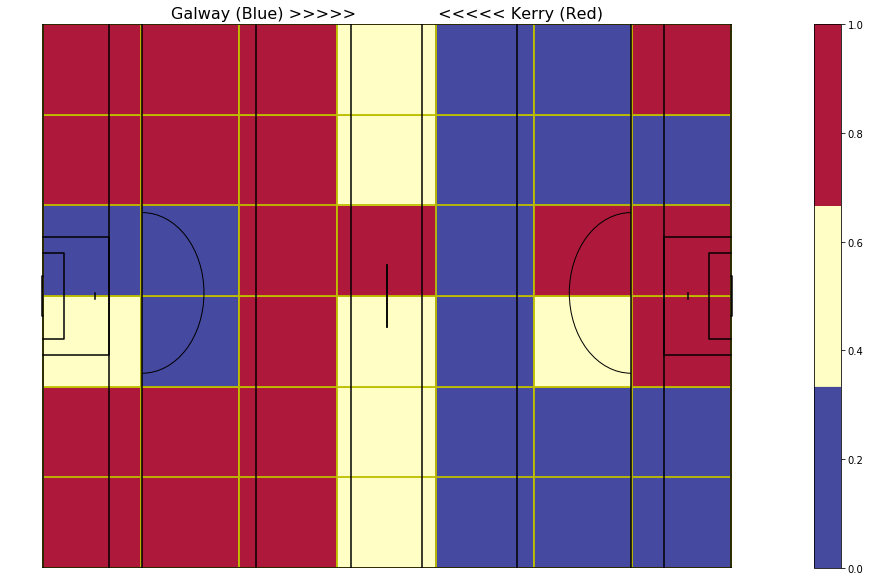

In [44]:
draw_map()